In [191]:
from __future__ import print_function
from pprint import pprint
from lightkurve import KeplerTargetPixelFile
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from astropy.table import Table

In [192]:
tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()   

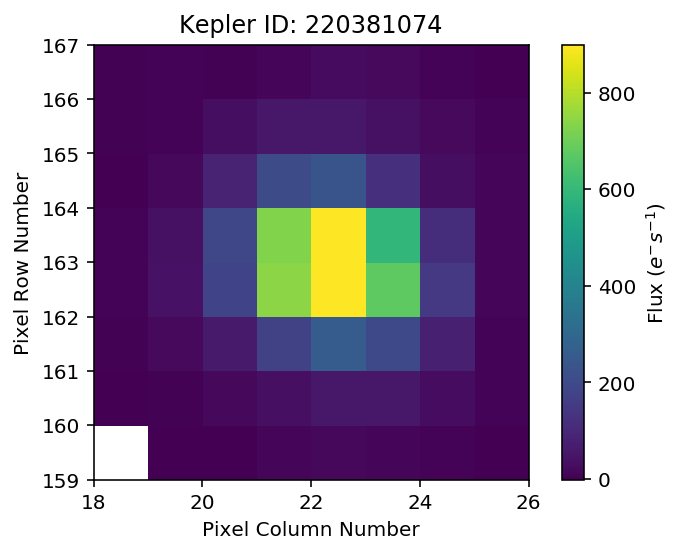

In [193]:
tpf.plot()

(0.8, 1.2)

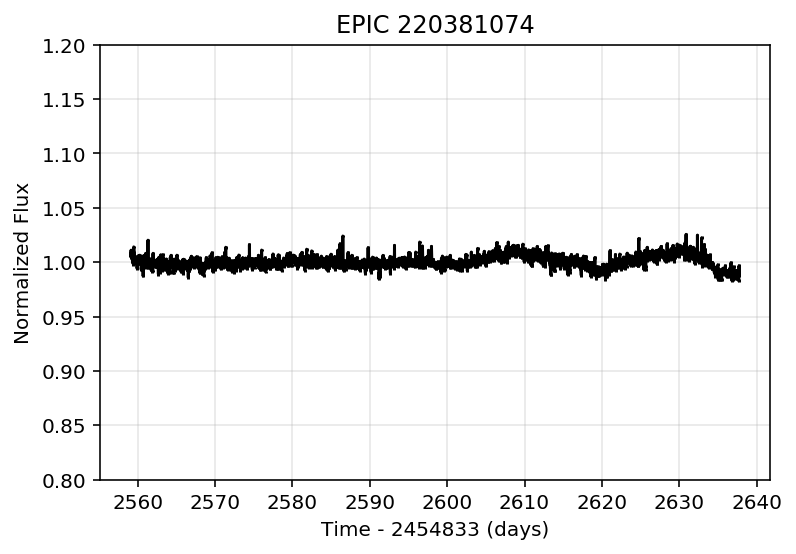

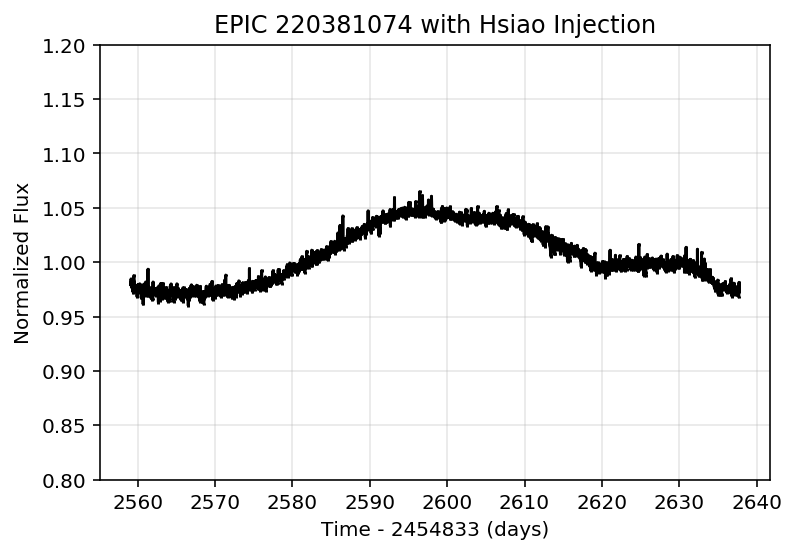

In [215]:
lcinj = lc.inject_sn(t0=np.nanmedian(lc.time), source='hsiao', z=0.5, amplitude=2.e-4)


#K2 light curve
lc.plot()
plt.title('EPIC 220381074')
plt.ylim(0.8,1.2)

#K2 light curve with injection
lcinj.plot()
plt.title('EPIC 220381074 with Hsiao Injection')
plt.ylim(0.8,1.2)

In [216]:
lcinj = lcinj.remove_nans()
lcinj = lcinj.normalize()
print(lcinj.flux)

[0.97952271 0.9814997  0.97886159 ... 0.98141368 0.97876226 0.97467613]


In [217]:
bandlist = ['kepler']*len(lcinj.time)

In [218]:
zpsys = ['ab']*len(lcinj.time)

In [219]:
data = sncosmo.load_example_data()

print(type(data['time']))

<class 'astropy.table.column.Column'>


In [227]:

model = sncosmo.Model(source='hsiao')


data_dict = Table()

data_dict['time'] = lcinj.time
data_dict['flux'] = lcinj.flux
data_dict['band'] = bandlist
data_dict['fluxerr'] = lcinj.flux_err
data_dict['zp'] = [1]*len(lcinj.time)
data_dict['zpsys'] = zpsys
data_dict['gain'] = [2]*len(lcinj.time)
data_dict['skynoise'] = [8000]*len(lcinj.time)
pprint(data_dict)

params = {'z': 0.5, 't0':np.nanmedian(lc.time), 'amplitude':2.e-4}

sncosmo.realize_lcs(data_dict, model, [params])






<Table length=3580>
       time               flux         band  ... zpsys  gain skynoise
     float64            float64        str6  ...  str2 int64  int64  
------------------ ------------------ ------ ... ----- ----- --------
 2559.068293953511 0.9795227051425335 kepler ...    ab     2     8000
   2559.0887261393  0.981499698103476 kepler ...    ab     2     8000
2559.1091583246234 0.9788615927994317 kepler ...    ab     2     8000
 2559.129590509474 0.9846091374770265 kepler ...    ab     2     8000
 2559.150022693866 0.9783508046666788 kepler ...    ab     2     8000
 2559.170454877327 0.9797946542063519 kepler ...    ab     2     8000
2559.1908870603147  0.979006720915693 kepler ...    ab     2     8000
 2559.211319342845 0.9766110194428061 kepler ...    ab     2     8000
 2559.231751424908 0.9772213188193069 kepler ...    ab     2     8000
2559.2726158871665 0.9790412205636468 kepler ...    ab     2     8000
               ...                ...    ... ...   ...   ...      ...


[<Table length=3580>
        time         band          flux             fluxerr         zp  zpsys
      float64        str6        float64            float64       int64  str2
 ------------------ ------ ------------------- ------------------ ----- -----
  2559.068293953511 kepler  15748.969231192117             8000.0     1    ab
    2559.0887261393 kepler  -3251.360818890101             8000.0     1    ab
 2559.1091583246234 kepler -2158.6436877824603             8000.0     1    ab
  2559.129590509474 kepler  -135.2950250877441             8000.0     1    ab
  2559.150022693866 kepler -2120.0340363728174             8000.0     1    ab
  2559.170454877327 kepler  16013.067029693488             8000.0     1    ab
 2559.1908870603147 kepler  -9164.304833118653             8000.0     1    ab
  2559.211319342845 kepler    721.243577712484             8000.0     1    ab
  2559.231751424908 kepler   10737.38511657054             8000.0     1    ab
 2559.2726158871665 kepler -3809.9929599385

In [228]:
# create a model

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data_dict, model, ['z', 't0', 'amplitude'], bounds={'z':(0.45, 0.55)})

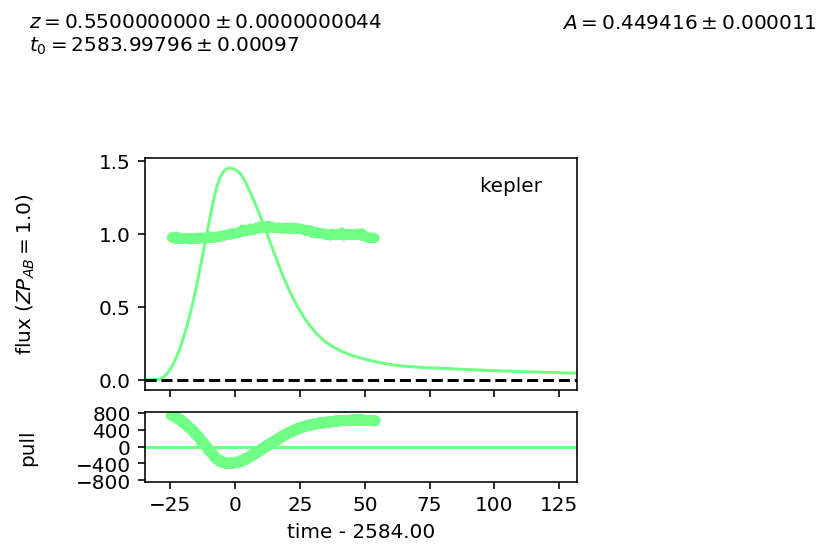

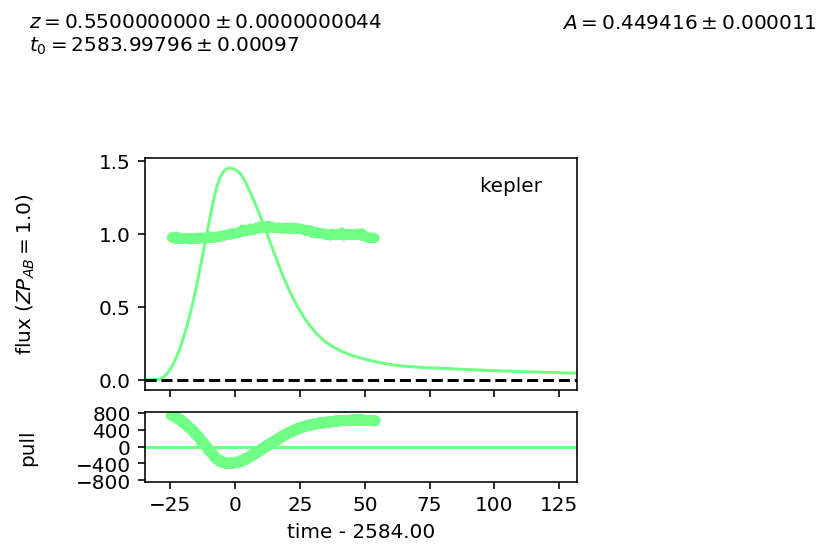

In [229]:
sncosmo.plot_lc(data_dict, model=fitted_model, errors=result.errors, zp=1.0)

In [224]:
#data = sncosmo.load_example_data()
#sncosmo.plot_lc(data)

In [ ]:

import sncosmo
lcinj = lc.inject_sn(t0=np.nanmedian(lc.time), source='hsiao', z=0.5, amplitude=2.e-4)
        model = sncosmo.Model(source='hsiao')
        model.set(t0=t0, **kwargs)
bandflux = model.bandflux('kepler', self.time)
mergedflux = self.flux + bandflux